## Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Setting the style to 'Whitegrid'
sns.set_style("whitegrid")

# Part I- A

### Calculating the average growth of states over the duration 2013-14, 2014-15 and 2015-16:

In [2]:
# Uploading the data
gdpDataSet = pd.read_csv("./Data IA/ab40c054-5031-4376-b52e-9813e776f65e.csv")

# Setting index of the dataframe to Duration
gdpDataSet_1 = gdpDataSet.set_index("Duration", drop = False)

# Dropping the data for Duration 2016-17
gdpDataSet_1 = gdpDataSet_1.drop(["2016-17"])

In [3]:
# Setting index to 'Items Description' to select only '(% Growth over previous year)' column values
gdpDataSet_2 = gdpDataSet_1.set_index("Items  Description", drop = False)
growthRate = gdpDataSet_2.loc["(% Growth over previous year)", :]

# Setting index of the dataframe to Duration to select values of relevent years.
growthRate_2 = growthRate.set_index("Duration", drop = False)
growthRate_2 = growthRate_2.loc[['2013-14', '2014-15', '2015-16']]

In [4]:
#Filling the rows with NaN values with mean value.
growthRate_2 = growthRate_2.fillna(growthRate_2.mean())

# Removing the columns with NaN values
growthRate_2 = growthRate_2.dropna(axis=1, how='all')

Text(0, 0.5, '% Mean Growth')

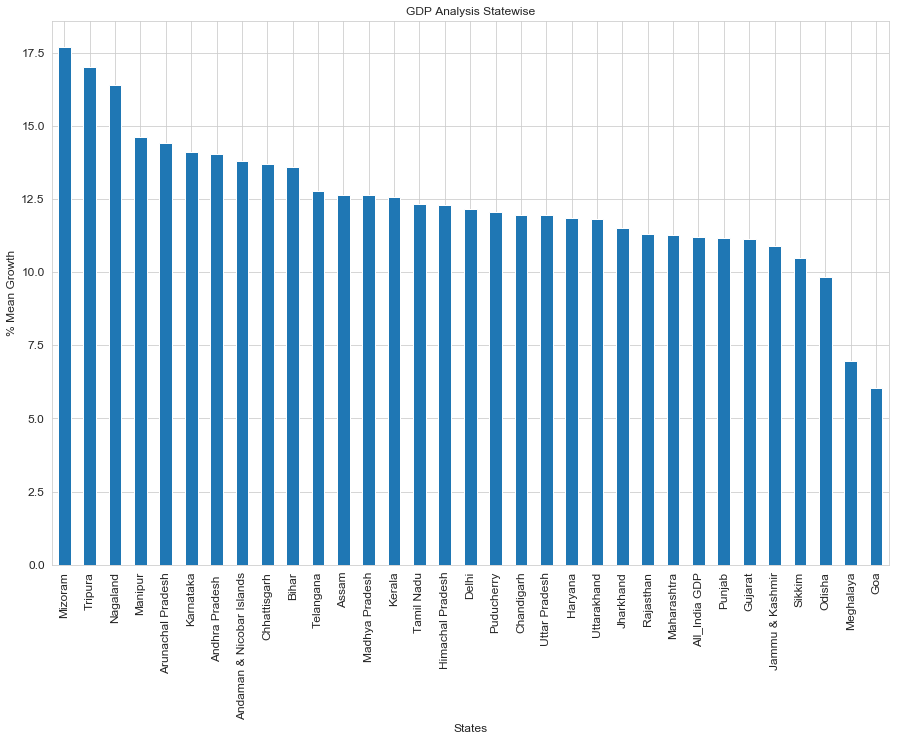

In [5]:
#Taking the mean values of gdpGrowthRate and sorting them in Descending order.
meanGrowthRate = growthRate_2.mean().sort_values(ascending=False)
meanGrowthRate = meanGrowthRate.to_frame()

#Plottng the bar chart between '% Mean Growth' Vs 'States'
gdpBarPlot = meanGrowthRate.plot(kind='bar', title ="GDP Analysis Statewise",figsize=(15,10),legend=False, fontsize=12)
gdpBarPlot.set_xlabel("States",fontsize=12)
gdpBarPlot.set_ylabel("% Mean Growth",fontsize=12)

### Plotting the total GDP of the states for the year 2015-16:

In [6]:
gdpDataSet_3 = gdpDataSet.set_index("Items  Description", drop = False)
gdpOneYear = gdpDataSet_3.loc["GSDP - CURRENT PRICES (` in Crore)", :]

In [7]:
# Setting index of the dataframe to Duration to select values of relevent years.
gdpOneYear_1 = gdpOneYear.set_index("Duration", drop = False)
gdpOneYear_1 = gdpOneYear_1.loc[['2015-16']]

In [8]:
gdpOneYear_2 = gdpOneYear_1.iloc[:,0:-1]

Text(0, 0.5, 'GDP')

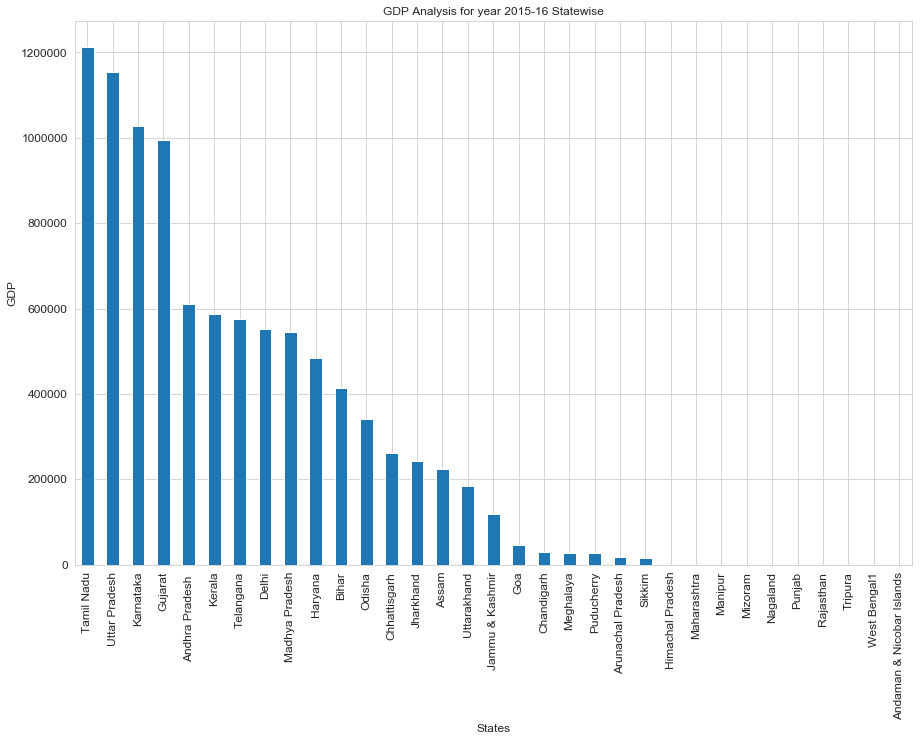

In [9]:
#Sorting them in Descending order.
gdpOneYear_3 = gdpOneYear_2.mean().sort_values(ascending=False)
gdpOneYear_3 = gdpOneYear_3.to_frame()

#Plottng the bar chart between '% Mean Growth' Vs 'States'
gdpBarPlotOneYear = gdpOneYear_3.plot(kind='bar', title ="GDP Analysis for year 2015-16 Statewise",figsize=(15,10),legend=False, fontsize=12)
gdpBarPlotOneYear.set_xlabel("States",fontsize=12)
gdpBarPlotOneYear.set_ylabel("GDP",fontsize=12)

# Part I- B

In [10]:
#Uploading all the csv files
csvFiles = glob.glob('./Data IB/*.csv')

#Initialzing the empty DataFrame
mergedStateData = pd.DataFrame()


for file in csvFiles:
    temp_df = pd.read_csv(file ,encoding = "latin_1")
    temp_df = temp_df.loc[::,['S.No.','Item','2014-15']]
    temp_df['State']=file.split('-')[1]
    mergedStateData = mergedStateData.append(temp_df)
    

# Setting index to 'Item' to select only 'Per Capita GSDP (Rs.)' column values
perCapitaGSDP = mergedStateData.set_index("Item", drop = False)
perCapitaGSDP = perCapitaGSDP.loc["Per Capita GSDP (Rs.)"]
perCapitaGSDP_1 = perCapitaGSDP.pivot(index='State', columns='Item', values='2014-15')

#Sorting the dataframe by 'perCapitaGSDP'
perCapitaGSDP_1= perCapitaGSDP_1.sort_values(by=['Per Capita GSDP (Rs.)'], ascending=False)

Text(0, 0.5, 'Per Capita GSDP')

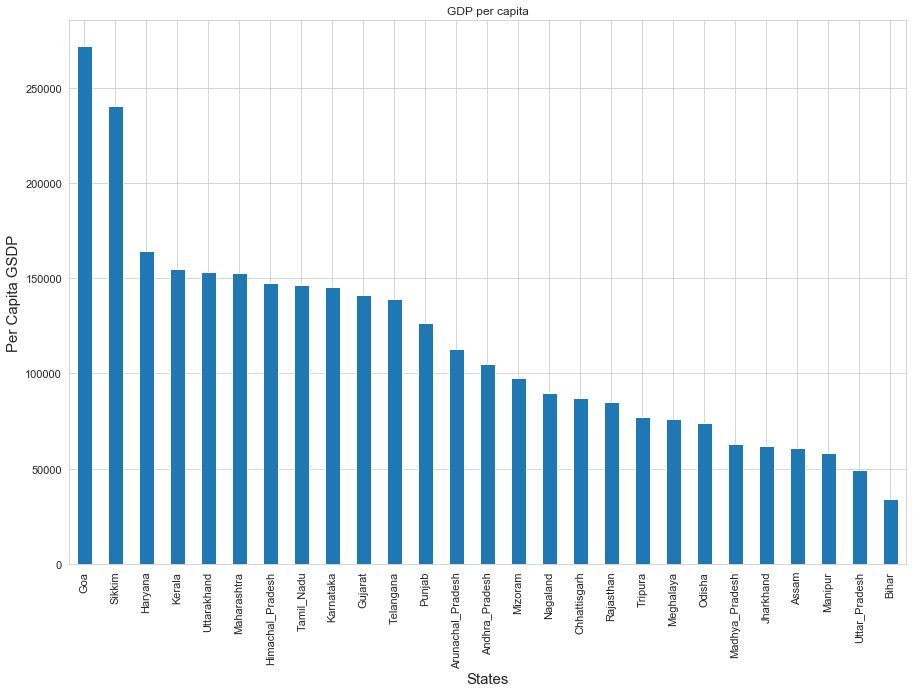

In [11]:
# Plottng the bar chart between '% Mean Growth' Vs 'States'
stateGsdpBarPlot = perCapitaGSDP_1.plot(kind='bar', title ="GDP per capita",figsize=(15,10),legend=False, fontsize=11)
stateGsdpBarPlot.set_xlabel("States",fontsize=15)
stateGsdpBarPlot.set_ylabel("Per Capita GSDP",fontsize=15)

## Compairing Primary, Scondary & Tertiary 

In [12]:
# Setting index to 'Items Description' to select only '(% Growth over previous year)' column values
compairingGsdp = mergedStateData.set_index("Item", drop = False)

compairingGsdp = compairingGsdp.loc[["Primary" ,"Secondary","Tertiary", "Gross State Domestic Product"]]


compairingGsdp_1=compairingGsdp.pivot(index='State', columns='Item', values='2014-15')
compairingGsdp_1

compairingGsdp_1['Primary %'] = (compairingGsdp_1['Primary']/compairingGsdp_1['Gross State Domestic Product'])*100
compairingGsdp_1['Secondary %'] = (compairingGsdp_1['Secondary']/compairingGsdp_1['Gross State Domestic Product'])*100
compairingGsdp_1['Tertiary %'] = (compairingGsdp_1['Tertiary']/compairingGsdp_1['Gross State Domestic Product'])*100

compairingGsdp_2 =  compairingGsdp_1.iloc[:,4:]

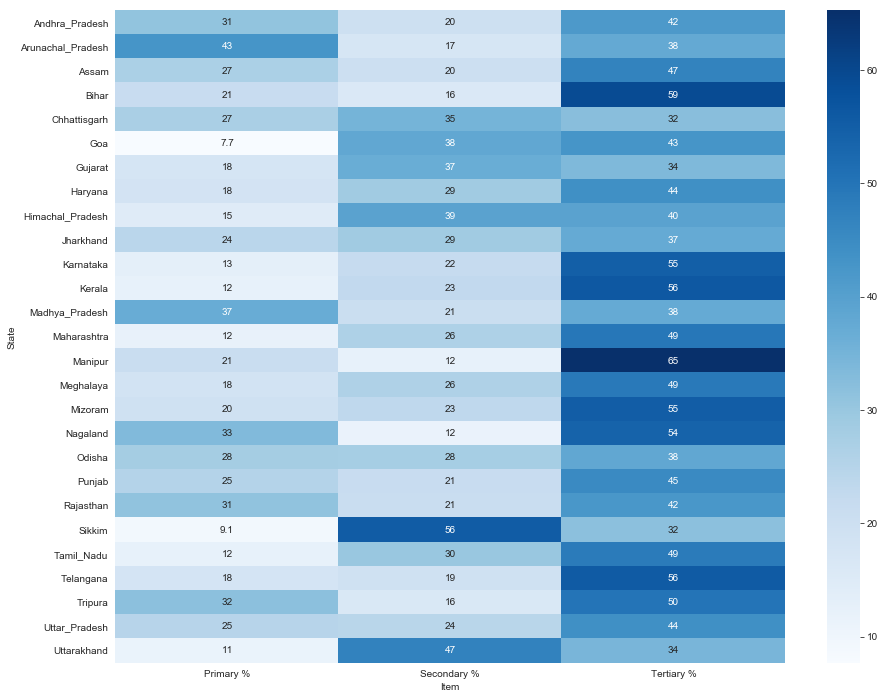

In [13]:
# Defining the figure size
plt.figure(figsize=(15,12))

# Plotting the HeatMap
sns.heatmap(compairingGsdp_2, cmap="Blues", annot=True)
plt.show()

## Categorising the states into four categories based on GDP per capita (C1, C2, C3, C4)

In [14]:
# Setting index to 'Items Description' to select only '(% Growth over previous year)' column values
categoryGsdp = mergedStateData.set_index("Item", drop = False)

categoryGsdp = categoryGsdp.pivot(index='State', columns='Item', values='2014-15')

# Categorizing the DataFrame on the basis of Percentile of 'Per Capita GSDP' 
categoryGsdp['Category'] = pd.qcut(categoryGsdp["Per Capita GSDP (Rs.)"], [0, 0.20,0.50,0.85,1.0] ,labels = ["C4", "C3", "C2", "C1"])

# Making a list of all the Sub-Sectors
subSectorList = ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Category', 'Gross State Domestic Product']
categoryGsdp_1 = categoryGsdp.loc[:,subSectorList]

categoryGsdp_1 = categoryGsdp_1.set_index("Category", drop = False)

categoryGsdp_1 = categoryGsdp_1.groupby(['Category']).sum()

categoryGsdp

C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 'Category' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  from ipykernel import kernelapp as app


Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Category
State,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,14900.0,928756.0,4664889.0,7893514.0,1151729.0,1900863.0,2270664.0,346160.0,52646842.0,...,1690800.0,48825542.0,5512100.00,22032942.0,3716000.0,NaN,4233400.0,5076984.0,94200.0,C3
Arunachal_Pradesh,686117.0,0.0,19568.0,147842.0,415520.0,113527.0,25207.0,8193.0,224017.0,1676119.0,...,30272.0,1636292.0,70099.00,631844.0,56796.0,NaN,60421.0,35203.0,0.0,C2
Assam,3855548.0,26223.0,357619.0,1733568.0,2890544.0,296587.0,543651.0,529539.0,261987.0,19809800.0,...,582406.0,18666897.0,1725309.00,9307109.0,2876251.0,NaN,2987155.0,1194568.0,4502.0,C4
Bihar,7951890.0,13599.0,919427.0,3449763.0,4688237.0,345168.0,1178022.0,653224.0,550132.0,37391988.0,...,2006421.0,36184863.0,3213546.00,22179969.0,7081391.0,NaN,7448373.0,3147173.0,2228.0,C4
Chhattisgarh,3948847.0,9507.0,294552.0,2669855.0,2613371.0,1198438.0,739057.0,385483.0,597785.0,23498180.0,...,1332092.0,22228481.0,2601791.00,7588778.0,1414164.0,NaN,1535571.0,871770.0,0.0,C3
Goa,308507.0,46359.0,44028.0,165819.0,140421.0,204110.0,233618.0,122201.0,15744.0,4063307.0,...,61854.0,3597882.0,527279.00,1738217.0,343492.0,NaN,380927.0,189656.0,17820.0,C1
Gujarat,13769969.0,NaN,1242520.0,5526017.0,9671086.0,3409983.0,4606644.0,638357.0,761616.0,89502727.0,...,1981546.0,79131102.0,12353171.04,30220377.0,10178713.0,NaN,10178713.0,4555910.0,NaN,C2
Haryana,8015238.0,NaN,479658.0,3702571.0,4636731.0,1101919.0,1671486.0,110080.0,352254.0,43746207.0,...,1067867.0,39828404.0,4985670.00,19226568.0,4817784.0,NaN,4986319.0,2560623.0,NaN,C1
Himachal_Pradesh,1514981.0,3979.0,194266.0,808256.0,853758.0,767268.0,362521.0,9968.0,540950.0,10436879.0,...,259291.0,9800853.0,895317.00,4133326.0,494162.0,NaN,615496.0,552234.0,0.0,C2


In [15]:
# Calculating the percentage contribution of each Sub-sector with respect to state GDP
for i in range (0,11):
    categoryGsdp_1[subSectorList[i]] = (categoryGsdp_1[subSectorList[i]]/categoryGsdp_1[subSectorList[-1]])*100   

In [16]:
# Removing GSDP from the DataFrame
categoryGsdp_2 = categoryGsdp_1.iloc[:,0:-1]

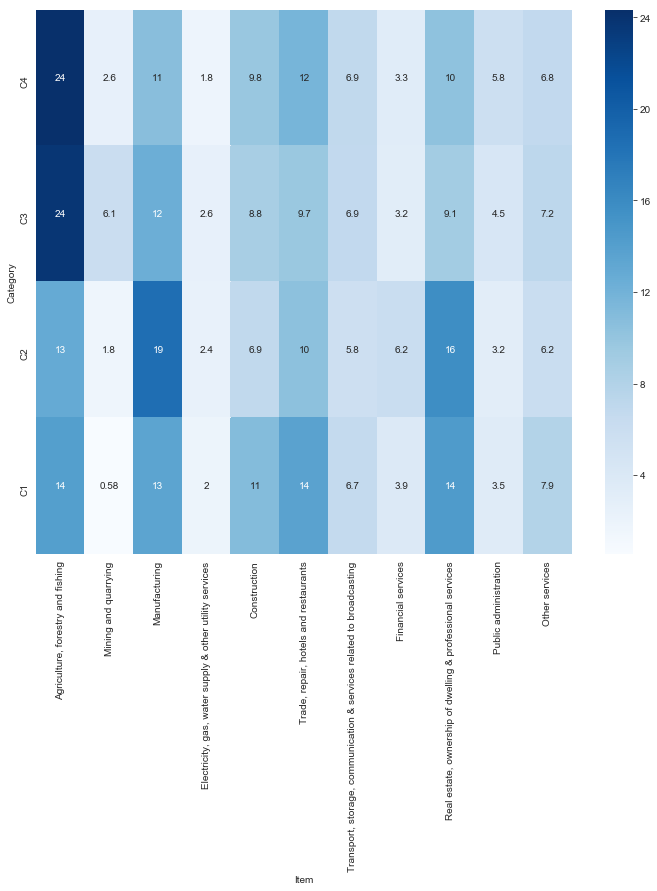

In [26]:
# Defining the figure size
plt.figure(figsize=(12,10))

# Plotting the HeatMap
sns.heatmap(categoryGsdp_2, cmap="Blues", annot=True)
plt.show()

# Part II: GDP and Education

In [18]:
# Uploading the data
gdpDropOutDataSet = pd.read_csv("./Data II/rs_session243_au570_1.1.csv")

In [19]:
# Making the list of relevant columns
columnList = ['Level of Education - State','Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']

gdpDropOutDataSet_1 = gdpDropOutDataSet.loc[:,columnList]

In [20]:
# Changing the names of state
# Because we have to merge the two data set with the same column so making the state names same in both data set
stateNameWith_ = ['Andhra_Pradesh', 'Arunachal_Pradesh','Himachal_Pradesh','Madhya_Pradesh','Tamil_Nadu', 'Uttar_Pradesh', 'Uttarakhand', 'Chhattisgarh']
stateNameWithOut_ = ['Andhra Pradesh', 'Arunachal Pradesh','Himachal Pradesh','Madhya Pradesh','Tamil Nadu', 'Uttar Pradesh', 'Uttrakhand', 'Chhatisgarh']

# Renaming the states to match with the names in other dataset to make it merge properly
perCapitaGSDP_2 = perCapitaGSDP.loc[:,].replace(stateNameWith_, stateNameWithOut_ )


In [21]:
# Changing the Column Names of the DataFrame
gdpDropOutDataSet_1.columns = ['State','Primary', 'Upper Primary', 'Secondary']

In [22]:
mergedGdpEduData = pd.merge(gdpDropOutDataSet_1, perCapitaGSDP_2, how='inner', on='State')

columnList_1 = ['State','Primary','Upper Primary', 'Secondary', '2014-15']

# Considering only the relevant columns for analysis
mergedGdpEduData_1 = mergedGdpEduData.loc[:,columnList_1]

# Renaming the columns for better understanding
mergedGdpEduData_1.columns = ['State','Primary', 'Upper Primary', 'Secondary', 'GSDP']

In [23]:
# Calculating the correlation of the data
corrMergedGdpEduData = mergedGdpEduData_1.corr()
round(corrMergedGdpEduData, 3)

,Primary,Upper Primary,Secondary,GSDP
Primary,1.000,0.437,0.127,-0.455
Upper Primary,0.437,1.000,0.549,-0.543
Secondary,0.127,0.549,1.000,-0.466
GSDP,-0.455,-0.543,-0.466,1.000


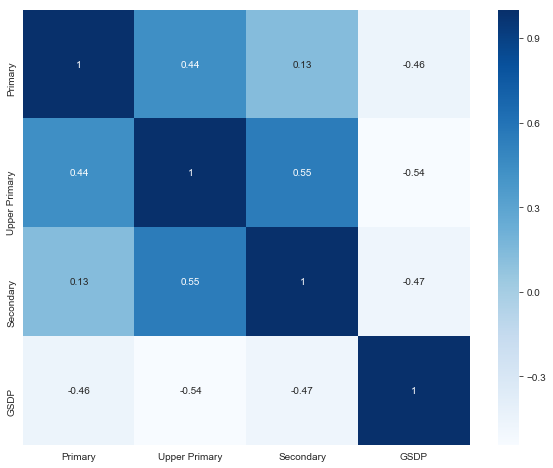

In [27]:
# Defining the figure size
plt.figure(figsize=(10,8))

# Plotting the HeatMap
sns.heatmap(corrMergedGdpEduData, cmap="Blues", annot=True)
plt.show()